In [300]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [301]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Task 1 - Problem Analysis and Data Preprocess

In [302]:
base_path = r'.'
files = ['accessories.csv', 'bags.csv', 'beauty.csv', 'house.csv', 
         'jewelry.csv', 'kids.csv', 'men.csv', 'shoes.csv', 'women.csv']

data_frames = {file.split('.')[0]: pd.read_csv(os.path.join(base_path, file)) for file in files}

# Access the DataFrames
data_frame_accessories = data_frames['accessories']
data_frame_bags = data_frames['bags']
data_frame_beauty = data_frames['beauty']
data_frame_house = data_frames['house']
data_frame_jewelry = data_frames['jewelry']
data_frame_kids = data_frames['kids']
data_frame_men = data_frames['men']
data_frame_shoes = data_frames['shoes']
data_frame_women = data_frames['women']

In [303]:
df = pd.concat(data_frames.values(), ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74999 entries, 0 to 74998
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               74999 non-null  object 
 1   subcategory            74999 non-null  object 
 2   name                   74999 non-null  object 
 3   current_price          74999 non-null  float64
 4   raw_price              74999 non-null  float64
 5   currency               74999 non-null  object 
 6   discount               74999 non-null  int64  
 7   likes_count            74999 non-null  int64  
 8   is_new                 74999 non-null  bool   
 9   brand                  14161 non-null  object 
 10  brand_url              10340 non-null  object 
 11  codCountry             65889 non-null  object 
 12  variation_0_color      63215 non-null  object 
 13  variation_1_color      52652 non-null  object 
 14  variation_0_thumbnail  63215 non-null  object 
 15  va

In [304]:
df

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,accessories,Chapeaux & Bonnets,Masques d'isolation de protection du visage Ma...,9.99,16.99,USD,41,373,False,NaN,...,Gray,Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/hats-and-caps-4192/p-16...,1671872,SKUF08305
1,accessories,Baseball Caps,Chapeau de parasol de casquette de baseball en...,9.99,18.99,USD,47,73,False,NaN,...,Navy,Black,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/baseball-caps-12158/p-1...,1674377,SKUF11351
2,accessories,Flat Caps,Casquette Gavroche Cabbie Lvy Flat Hat Vintage...,17.49,37.34,USD,53,140,False,NaN,...,Black,camel,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/flat-caps-12160/p-16377...,1637790,SKUE50978
3,accessories,Cache-oreilles & Masques,Masque à fleurs en coton multicolore Masque vi...,5.99,16.01,USD,63,686,False,NaN,...,#01,#02,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/earmuffsandmouth-maskan...,1654953,SKUE76490
4,accessories,Chapeaux & Bonnets,Chapeau de pêche en plein air pour hommes,13.99,26.99,USD,48,35,False,NaN,...,Black,Army Green,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/hats-and-caps-4192/p-16...,1666600,SKUE75375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74994,women,Soutiens-gorge,Soutiens-gorge respirants doublés de dentelle ...,20.89,40.55,USD,49,62,False,NaN,...,Coffee,Black,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/bra-and-bra-set-4183/p-...,1551409,SKUD09371
74995,women,Hoodies,Oreilles à capuche Cartoon Hoodie,41.30,79.67,USD,48,279,False,Gracila,...,Pink,Navy,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/gracila-hoodies-12235/p...,1571983,SKUD01126
74996,women,Pajama Sets,Vêtements de détente d'été à imprimé pois verts,23.69,45.89,USD,48,70,False,NaN,...,Green,NaN,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/pajama-sets-12218/p-167...,1677543,SKUF07790
74997,women,Blouses & Chemises,Chemisier décontracté Stringy Selvedge,25.99,49.99,USD,48,34,False,Gracila,...,Blue,NaN,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,NaN,NaN,https://im

####  Pre-process Dataframe

In [305]:
chosen_columns = {'category', 'name', 'current_price', 'raw_price', 'likes_count', 'discount', 'is_new'}
df = df.loc[:, df.columns.intersection(chosen_columns)]

In [306]:
# Define a dictionary with the columns as keys and their fill values as values
fill_values = {
    'likes_count': 0,
    'discount': 0,
    'current_price': df['current_price'].median()
}

# Use a loop to fill missing values for each specified column without using inplace
for column, value in fill_values.items():
    df[column] = df[column].fillna(value)

In [307]:
df = df[df['likes_count'] > 50]

#### Hypothesis 1: Price and Likes Count

**Question**: Is there a significant correlation between the `current_price` and the `likes_count` of products?

- **Null Hypothesis (H0)**: There is no significant correlation between `current_price` and `likes_count`. (Correlation coefficient = 0)
- **Alternative Hypothesis (HA or H1)**: There is a significant correlation between `current_price` and `likes_count`. (Correlation coefficient ≠ 0)

In [308]:
# Calculate Pearson correlation coefficient
correlation = df['current_price'].corr(df['likes_count'])
print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: 0.03592696432826536


In [309]:
import scipy.stats as stats

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(df['current_price'], df['likes_count'])
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)


alpha = 0.05

# Decision based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between current_price and likes_count.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between current_price and likes_count.")

Pearson Correlation Coefficient: 0.035926964328265386
P-value: 2.564527505355469e-14
Reject the null hypothesis: There is a significant correlation between current_price and likes_count.


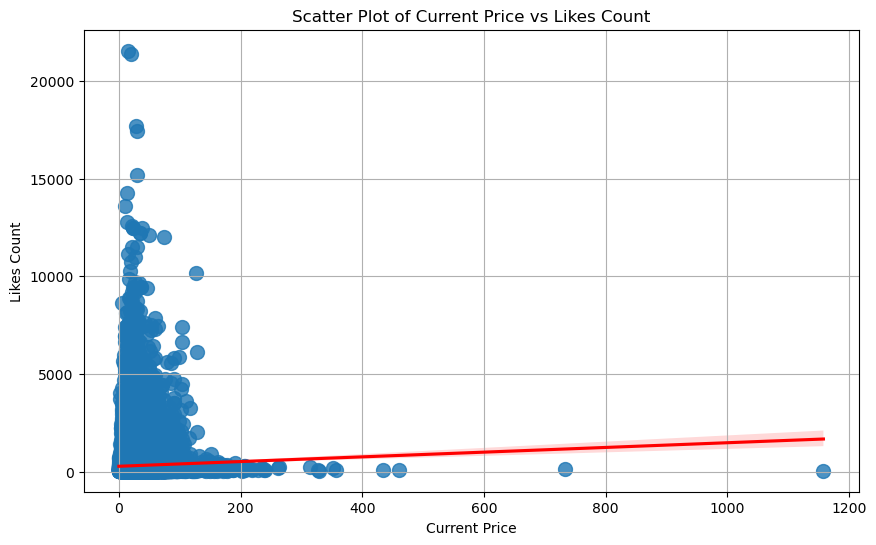

In [310]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='current_price', y='likes_count', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title('Scatter Plot of Current Price vs Likes Count')
plt.xlabel('Current Price')
plt.ylabel('Likes Count')
plt.grid(True)
plt.show()

#### Hypothesis 2: Discount and Likes Count

**Question**: Does the `discount` offered on a product affect the `likes_count`?

- **Null Hypothesis (H0)**: There is no significant correlation between `discount` and `likes_count`. (Correlation coefficient = 0)
- **Alternative Hypothesis (HA or H1)**: There is a significant correlation between `discount` and `likes_count`. (Correlation coefficient ≠ 0)

Pearson Correlation Coefficient: 0.00917376187039371
Pearson Correlation Coefficient: 0.009173761870393714
P-value: 0.05180133346766473
Fail to reject the null hypothesis: There is no significant correlation between discount and likes_count.


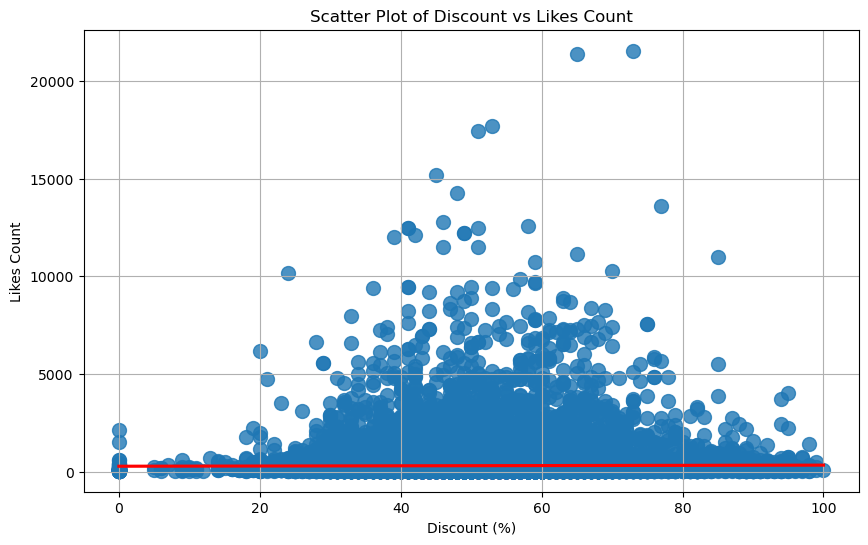

In [311]:
correlation = df['discount'].corr(df['likes_count'])
print("Pearson Correlation Coefficient:", correlation)

import scipy.stats as stats

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(df['discount'], df['likes_count'])
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

# Set the significance level
alpha = 0.05

# Decision based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between discount and likes_count.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between discount and likes_count.")

plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='discount', y='likes_count', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title('Scatter Plot of Discount vs Likes Count')
plt.xlabel('Discount (%)')
plt.ylabel('Likes Count')
plt.grid(True)
plt.show()


#### Hypothesis 3: Comparison of Likes Count Across Categories

**Question**: Is the average `likes_count` different across product categories?

- **Null Hypothesis (H0)**: The average `likes_count` is the same across all product categories.
- **Alternative Hypothesis (HA or H1)**: The average `likes_count` differs across at least one product category.

ANOVA F-statistic: 82.55020726675238
P-value: 2.5262184591460195e-136
Reject the null hypothesis: The average likes_count differs across at least one product category.


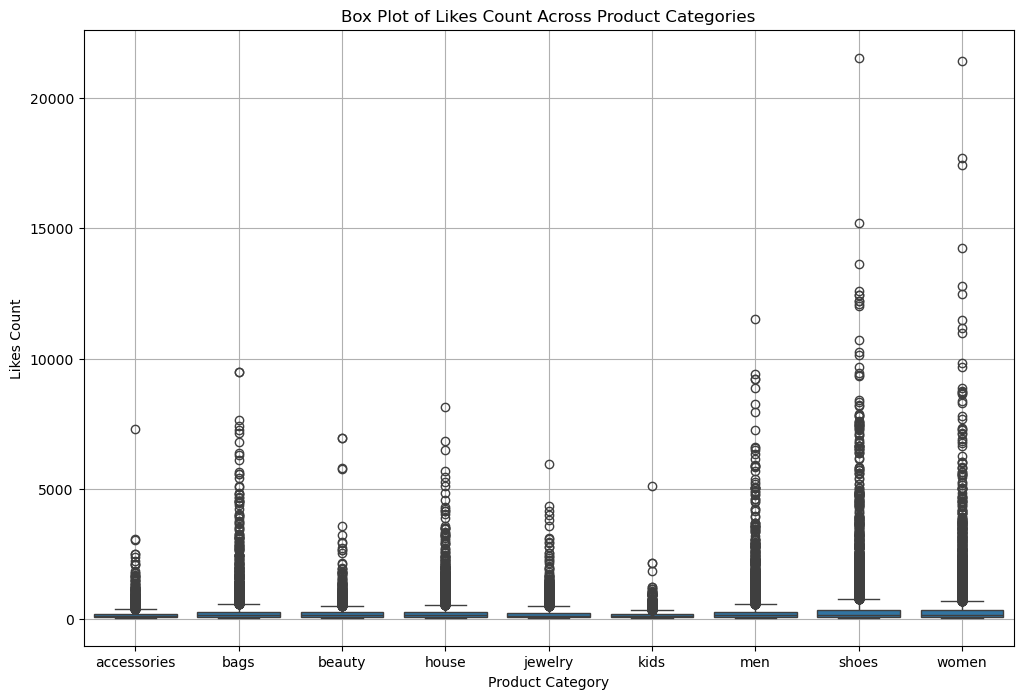

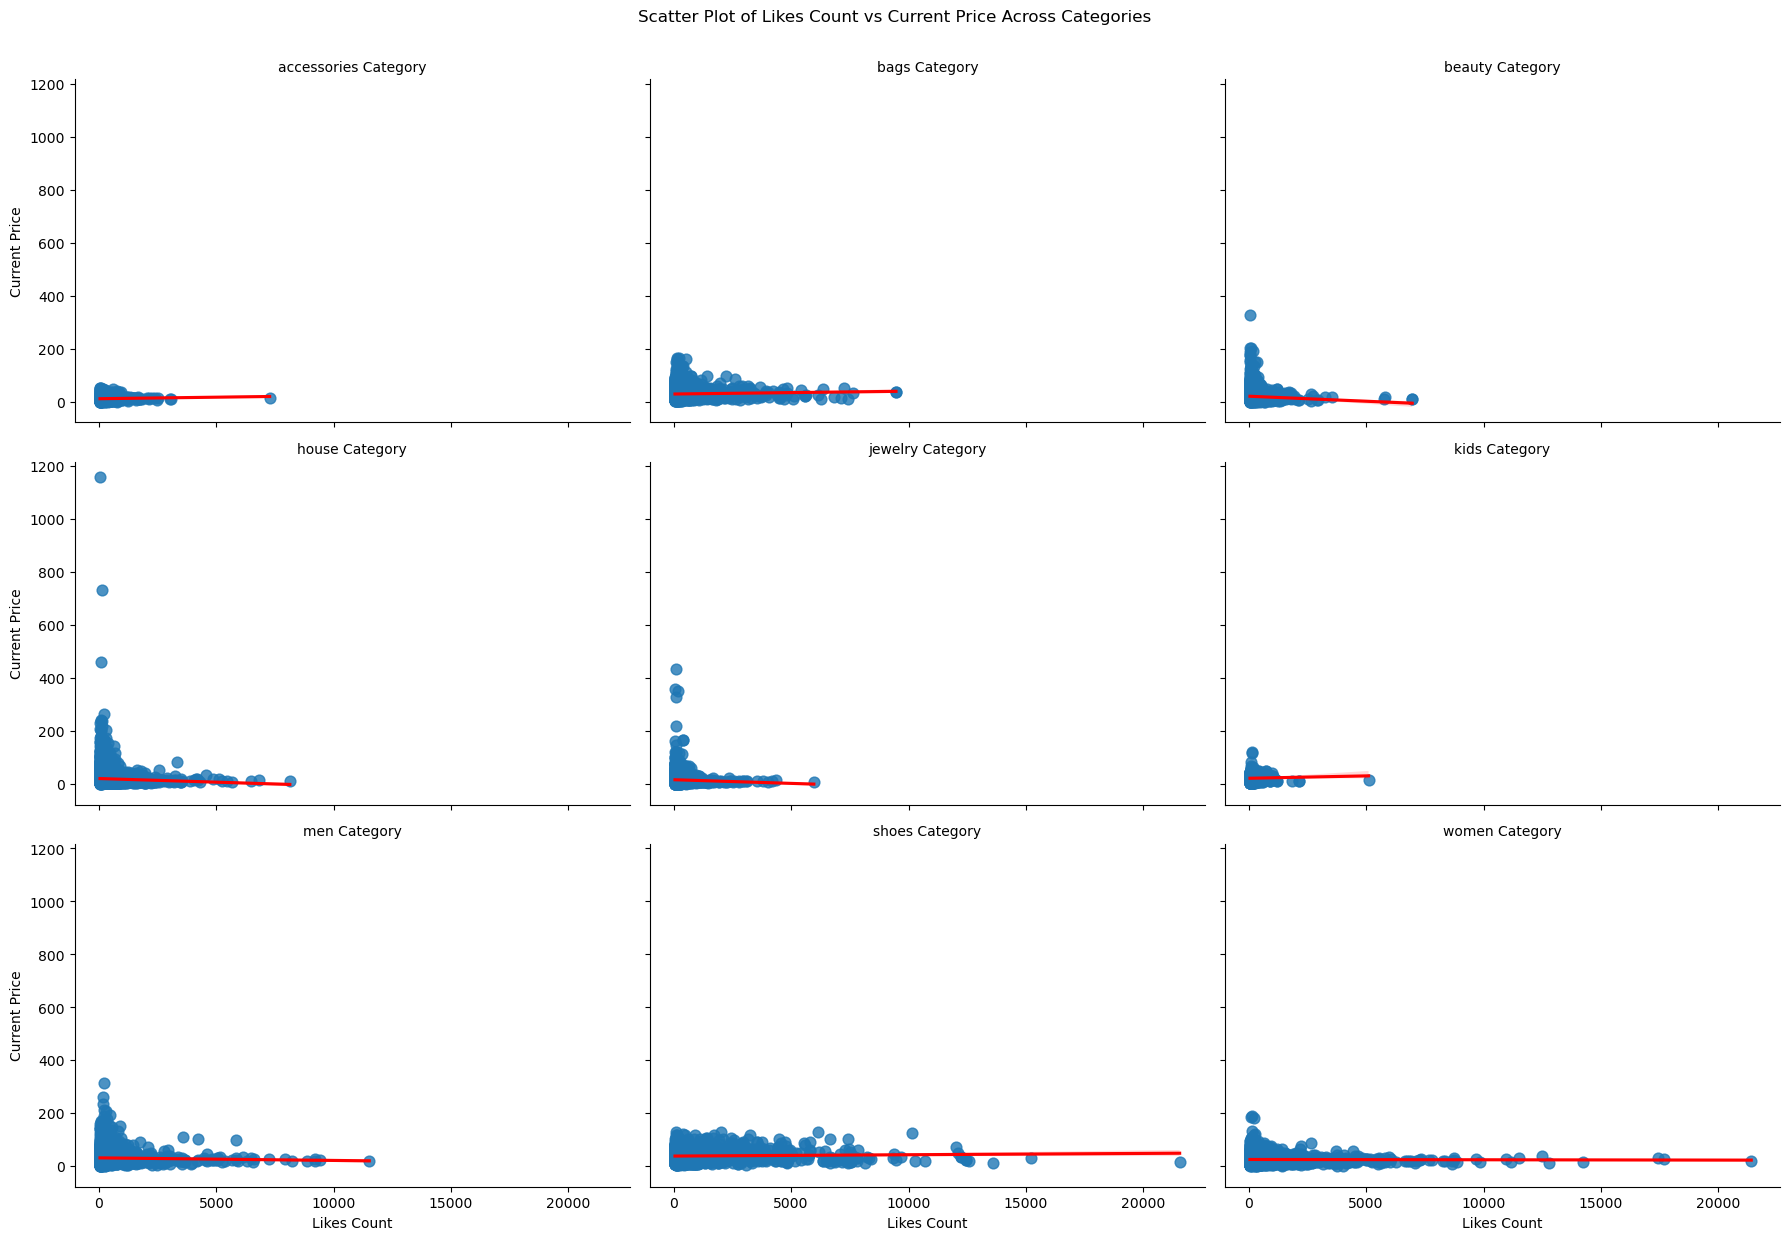

In [312]:
import scipy.stats as stats
import pandas as pd

likes_count_by_category = [group['likes_count'].values for name, group in df.groupby('category')]

f_statistic, p_value = stats.f_oneway(*likes_count_by_category)

print("ANOVA F-statistic:", f_statistic)
print("P-value:", p_value)

# Set the significance level
alpha = 0.05

# Decision based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: The average likes_count differs across at least one product category.")
else:
    print("Fail to reject the null hypothesis: The average likes_count is the same across all product categories.")


plt.figure(figsize=(12, 8))

# Box plot to compare likes count across categories
sns.boxplot(x='category', y='likes_count', data=df)
plt.title('Box Plot of Likes Count Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Likes Count')
plt.grid(True)
plt.show()



# Scatter plot with regression line for each category
g = sns.FacetGrid(df, col="category", col_wrap=3, height=4, aspect=1.5)
g.map(sns.regplot, "likes_count", "current_price", scatter_kws={'s':60}, line_kws={'color':'red'})
g.set_axis_labels("Likes Count", "Current Price")
g.set_titles(col_template="{col_name} Category")
g.fig.suptitle("Scatter Plot of Likes Count vs Current Price Across Categories", y=1.03)
plt.show()




#### Hypothesis 4: Price Influence on Discount

**Question**: Does the `raw_price` of a product influence the `discount` applied?

- **Null Hypothesis (H0)**: There is no significant correlation between `raw_price` and `discount`. (Correlation coefficient = 0)
- **Alternative Hypothesis (HA or H1)**: There is a significant correlation between `raw_price` and `discount`. (Correlation coefficient ≠ 0)

Pearson Correlation Coefficient: 0.10686682676239931
Pearson Correlation Coefficient: 0.10686682676239935
P-value: 2.8603612496754047e-114
Reject the null hypothesis: There is a significant correlation between raw_price and discount.


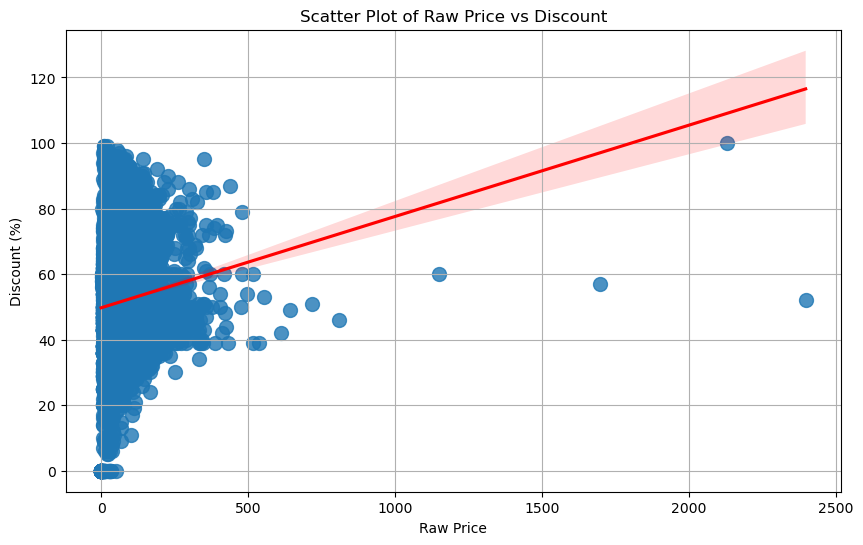

In [313]:
correlation = df['raw_price'].corr(df['discount'])
print("Pearson Correlation Coefficient:", correlation)

import scipy.stats as stats

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(df['raw_price'], df['discount'])
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

# Set the significance level
alpha = 0.05

# Decision based on p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between raw_price and discount.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between raw_price and discount.")


plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='raw_price', y='discount', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title('Scatter Plot of Raw Price vs Discount')
plt.xlabel('Raw Price')
plt.ylabel('Discount (%)')
plt.grid(True)
plt.show()


#### Premium Categories and Best 7 Categories


In [314]:

# Calculate average price per category and sort in descending order
def get_top_categories_by_price(df, top_n=7):
    avg_price_per_category = df.groupby('category')['current_price'].mean().sort_values(ascending=False)
    top_categories = avg_price_per_category.head(top_n).index.tolist()
    return top_categories

# Filter dataset to include only the top categories
def filter_top_categories(df, top_categories):
    return df[df['category'].isin(top_categories)]

# Find the top N products based on multiple criteria
def get_top_products(df, top_n=10):
    return df.sort_values(
        by=['likes_count', 'current_price', 'discount', 'is_new'], 
        ascending=[False, False, False, False]
    ).head(top_n)


# Get top 7 categories based on average current price
top_categories = get_top_categories_by_price(df, top_n=7)
    
# Filter the dataset to include only products from the top 7 categories
filtered_df = filter_top_categories(df, top_categories)
    
# Find the top 10 products in these categories
top_products = get_top_products(filtered_df, top_n=10)
    
# Output results
print("Top 7 Categories (based on average price):", top_categories)

Top 7 Categories (based on average price): ['shoes', 'men', 'bags', 'women', 'kids', 'beauty', 'house']


In [315]:
print("Top 10 Products in the Top 7 Categories:\n", top_products)

Top 10 Products in the Top 7 Categories:
       category                                               name  \
55676    shoes  Chaussures Plats Décontractées En Suède Mocass...   
70482    women               Blouse Large Couleur Pure pour Femme   
70457    women                   Robe Longue avec Boutons Chinois   
63939    women  Gracila Femme Maxi Robe Irrégulier Vêtement Vi...   
56378    shoes  Chaussures De Grande Taille Semelle Souple À E...   
60200    women  Soutien-gorge Sexy à Décollecté Plongeant sans...   
50188    shoes               Bottines Plates Doublées de Fourrure   
63442    women  Soutien-gorge Sexy Antichoc Sans Armature Ling...   
54981    shoes  SOCOFY Sandales Confortables Plates Avec Bride...   
74381    women        Manteau imprimé floral à feuilles à capuche   

       current_price  raw_price  discount  likes_count  is_new  
55676          14.99      54.95        73        21547   False  
70482          19.99      56.99        65        21403   False  
704

### Task 2: Clustering

In [316]:
# Drop non-integer columns
df_integers = df.drop(['category', 'name', 'is_new', 'discount'], axis=1)

Text(0, 0.5, 'WSS')

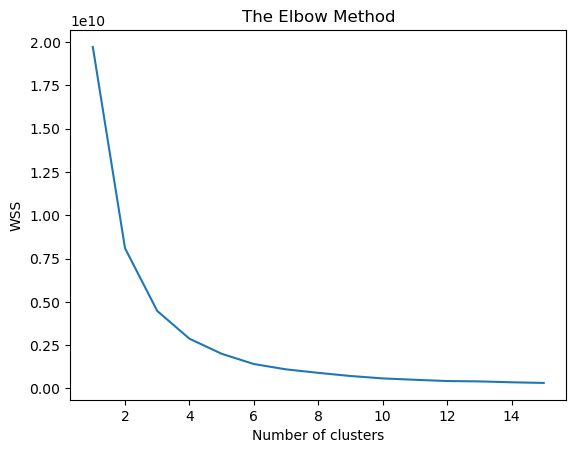

In [317]:
from  sklearn.cluster import KMeans

wss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(df_integers)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 16), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')

Observation of KMeans algorithm : 
       current_price  raw_price  likes_count
label                                       
0          25.295206  52.631291   202.259540
1          30.455578  66.111155  6716.721116
2          27.708442  59.428042  1809.154274


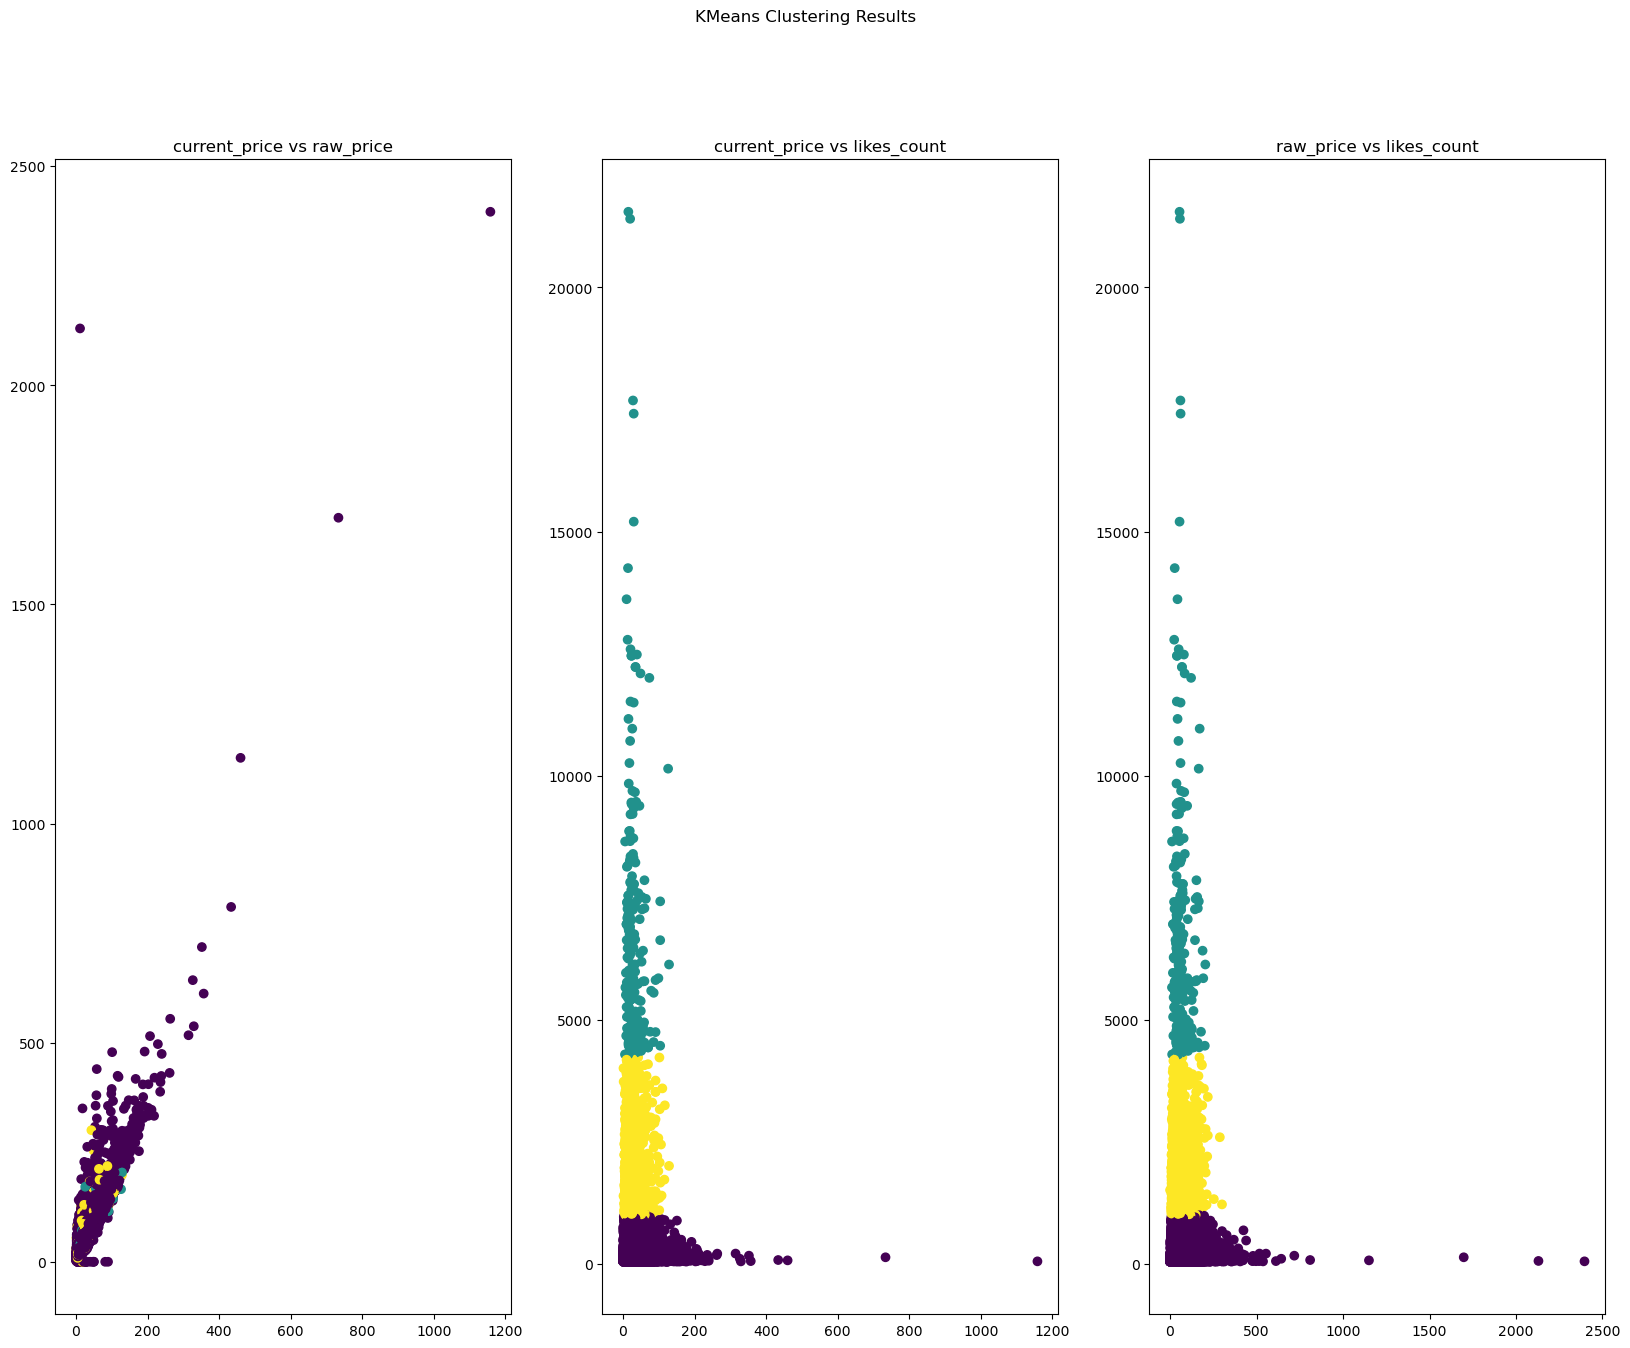

Observation of Agglomerative algorithm : 
       current_price  raw_price  likes_count
label                                       
0          28.916450  62.699485  2361.934202
1          25.300475  52.639532   214.512473
2          27.768761  61.562124  8754.309735


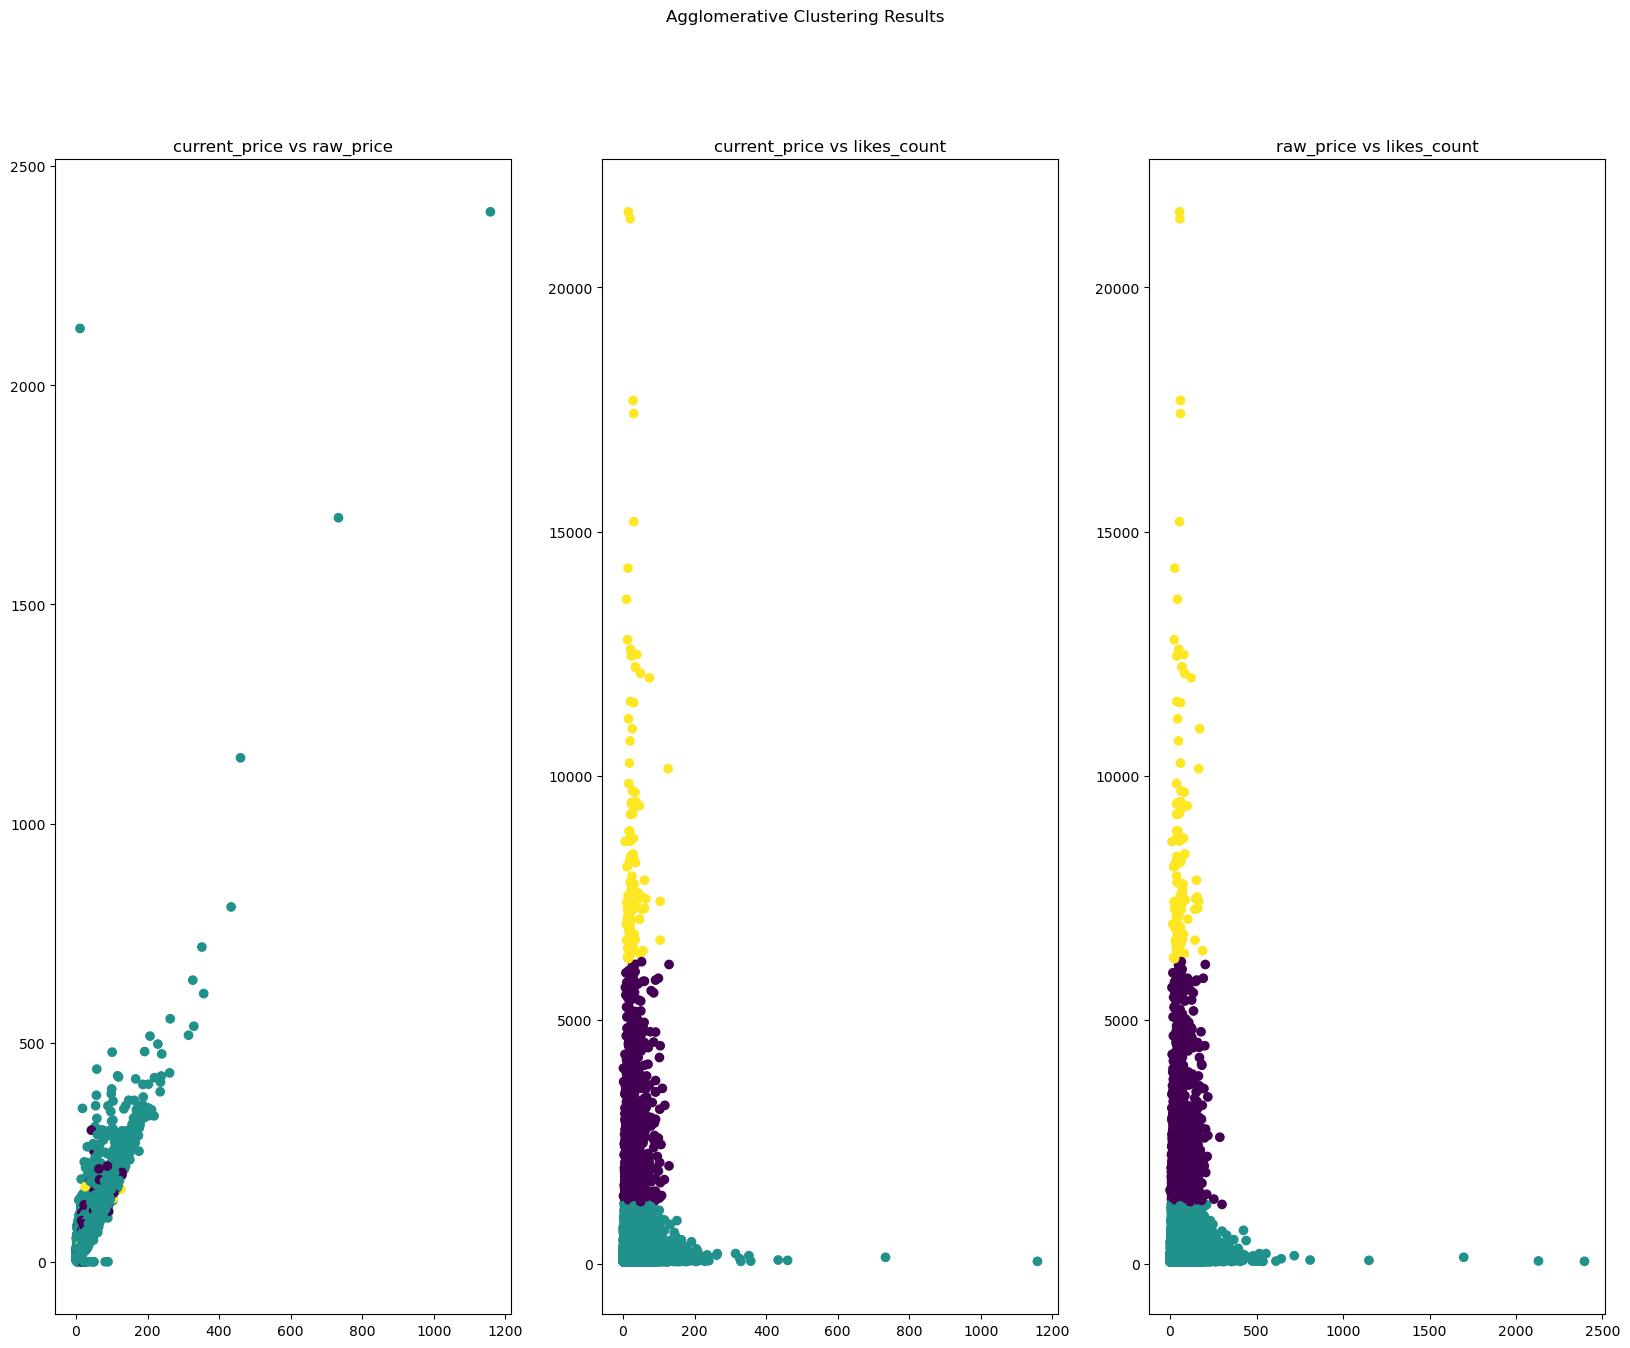


Silhouette Score:
KMeans: 0.8496214691772523
Agglomerative: 0.8765376564153393

Calinski-Harabasz Index:
KMeans: 76554.26994496658
Agglomerative: 69824.33452704301

Davies-Bouldin Index:
KMeans: 0.49417011642335273
Agglomerative: 0.4724145976176514

Best Algorithm based on Silhouette Score: Agglomerative


In [336]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Dictionary of clustering algorithms
algorithms = {
    "KMeans": KMeans(n_clusters=3),
    "Agglomerative": AgglomerativeClustering(n_clusters=3, linkage='ward')
}

# Initialize dictionary to store metrics
metrics = {
    "Silhouette Score": {},
    "Calinski-Harabasz Index": {},
    "Davies-Bouldin Index": {}
}


# Iterate through each algorithm and compute the clustering metrics
for name, algorithm in algorithms.items():
    labels = algorithm.fit_predict(df_integers)
    
    metrics["Silhouette Score"][name] = silhouette_score(df_integers, labels)
    metrics["Calinski-Harabasz Index"][name] = calinski_harabasz_score(df_integers, labels)
    metrics["Davies-Bouldin Index"][name] = davies_bouldin_score(df_integers, labels)


    # Create a copy of the dataframe to add the labels
    df_copy = df_integers.copy()
    df_copy['label'] = labels
    
    # Compute mean values for each cluster
    df_mean = df_copy.groupby(['label']).agg('mean')

    print(f"Observation of {name} algorithm : \n{df_mean}")
    
    # Visualization
    fig, axs = plt.subplots(1, 3, figsize=(20, 15))  # Change to 1 row and 3 columns
    columns = list(df_mean.columns)
    j2, i2 = 0, 0
    for i in range(len(columns) - 1):
        for j in range(i + 1, len(columns)):
            if i2 > 2:  # Adjust condition to limit the number of plots to 3 in a row
                break
            axs[i2].scatter(df_copy[columns[i]], df_copy[columns[j]], c=labels)
            axs[i2].set_title('{} vs {}'.format(columns[i], columns[j]))
            i2 += 1
    plt.suptitle(f"{name} Clustering Results")
    plt.show()



# Print the metrics for each algorithm
for metric_name, metric_values in metrics.items():
    print(f"\n{metric_name}:")
    for algo_name, value in metric_values.items():
        print(f"{algo_name}: {value}")

# Determine the best algorithm based on the Silhouette Score
best_algorithm = max(metrics["Silhouette Score"], key=metrics["Silhouette Score"].get)
print(f"\nBest Algorithm based on Silhouette Score: {best_algorithm}")

### Task 3: Classification 

#### Classify if the product will be popular

In [319]:
# set the popularity threshold

df['popularity'] = df['likes_count'].apply(lambda x: 1 if x > 200 else 0)

In [320]:
le_category = LabelEncoder()
df['category'] = le_category.fit_transform(df['category'])

In [321]:
df['is_new'] = df['is_new'].astype(int)

In [322]:
# Select features and target

X = df[['category', 'current_price', 'is_new', 'raw_price']]
y = df['popularity']

In [323]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [324]:
# Apply k-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation
knn = KNeighborsClassifier(n_neighbors=5)

In [325]:
cv_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy')

# Print average accuracy and standard deviation
print(f'Average Accuracy: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation: {cv_scores.std() * 100:.2f}%')

Average Accuracy: 60.64%
Standard Deviation: 0.62%


Accuracy for this fold: 60.24%
Confusion Matrix for this fold:
[[2139  730]
 [1057  569]]


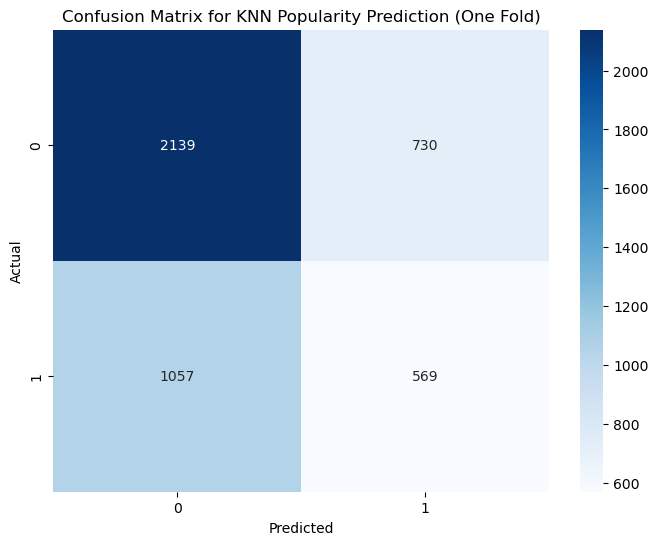

In [326]:
# To get confusion matrix for one of the folds (optional):
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit model and make predictions
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'Accuracy for this fold: {accuracy * 100:.2f}%')
    print('Confusion Matrix for this fold:')
    print(cm)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for KNN Popularity Prediction (One Fold)')
    plt.show()
    
    break  # Remove this break if you want to see results for all folds